In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Condition Matrix

In [2]:
prev_len = [30, 60, 90]
prev_type = ['TT', 'AC']
match_score = [70, 85, 95]
tile_size = [0.2, 0.4]

In [3]:
conditions = []
for lenth in prev_len:
    obs = []
    for type in prev_type:
        for score in match_score:
            for size in tile_size:
                condition = [lenth, type, score, size]
                conditions.append(condition)


In [4]:
len(conditions)

36

In [5]:
cm = pd.DataFrame(conditions, columns=['Prev.Length', 'Prev.Type',
                                        'Match.Score', 'Tile.Size'])

In [6]:
cm

,Prev.Length,Prev.Type,Match.Score,Tile.Size
0,30,TT,70,0.2
1,30,TT,70,0.4
2,30,TT,85,0.2
3,30,TT,85,0.4
4,30,TT,95,0.2
5,30,TT,95,0.4
6,30,AC,70,0.2
7,30,AC,70,0.4
8,30,AC,85,0.2
9,30,AC,85,0.4


In [7]:
cm.to_csv('THIRTEEN.csv', index=False)

# Factorial Experiments to Select Significant Design Factors

In [8]:
df = pd.read_csv('RESULTS_THIRTEEN_2022-01-17.csv')

In [9]:
df.head()

,Prev.Length,Prev.Type,Match.Score,Tile.Size,Browse.Time
0,30,TT,70,0.2,14.145002
1,30,TT,70,0.4,16.485194
2,30,TT,85,0.2,16.296595
3,30,TT,85,0.4,14.681242
4,30,TT,95,0.2,14.332062


In [10]:
import statsmodels.formula.api as smf
from scipy import stats

In [11]:
# Rename columns
df1 = df.rename(columns={'Prev.Type': 'Prev_Type', 'Prev.Length': 'Prev_Length', 'Match.Score': 'Match_Score',
                         'Tile.Size': 'Tile_Size', 'Browse.Time': 'Browse_Time'})
df1.columns

Index(['Prev_Length', 'Prev_Type', 'Match_Score', 'Tile_Size', 'Browse_Time'], dtype='object')

## Full Model

In [12]:
model = smf.ols('Browse_Time ~ C(Prev_Length) * C(Prev_Type) * C(Match_Score) * C(Tile_Size)', data = df1)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1006.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:14:24   Log-Likelihood:                -5102.7
No. Observations:                3600   AIC:                         1.028e+04
Df Residuals:                    3564   BIC:                         1.050e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [13]:
import statsmodels.api as sm

## Full Model vs Reduced Model without 4-Factor Interaction Terms

In [14]:
model_red1 = smf.ols('Browse_Time ~ C(Prev_Length) * C(Prev_Type) * C(Match_Score) + C(Tile_Size):C(Prev_Length) + C(Tile_Size):C(Prev_Type) + C(Tile_Size):C(Match_Score) + C(Tile_Size):C(Prev_Length):C(Match_Score) + C(Tile_Size):C(Match_Score):C(Prev_Type)' , data=df1).fit()
sm.stats.anova_lm(model_red1, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3570.0,3595.468620,0.0,NaN,NaN,NaN
1,3564.0,3589.155148,6.0,6.313472,1.044871,0.39393


Reduced model without "Tile_Size" is better than full model

In [15]:
print(model_red1.summary())

                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1214.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:14:28   Log-Likelihood:                -5105.9
No. Observations:                3600   AIC:                         1.027e+04
Df Residuals:                    3570   BIC:                         1.046e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

## Full Model vs Reduced Model (Only significant interaction terms/main effect terms)

In [16]:
model_red2 = smf.ols('Browse_Time ~ C(Prev_Length) + C(Prev_Type) + C(Match_Score) + C(Prev_Length):C(Match_Score) + C(Prev_Length):C(Prev_Type)' , data=df1).fit()
sm.stats.anova_lm(model_red2, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3588.0,3608.715549,0.0,NaN,NaN,NaN
1,3564.0,3589.155148,24.0,19.560401,0.809305,0.728669


In [17]:
print(model_red2.summary())

                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     3204.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:14:30   Log-Likelihood:                -5112.5
No. Observations:                3600   AIC:                         1.025e+04
Df Residuals:                    3588   BIC:                         1.032e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

## Previous model vs removing "Prev_Length:Prev_Type"

In [18]:
model_red3 = smf.ols('Browse_Time ~ C(Prev_Length) + C(Prev_Type) + C(Match_Score) + C(Prev_Length):C(Match_Score)' , data=df1).fit()
sm.stats.anova_lm(model_red3, model_red2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3590.0,3611.338161,0.0,NaN,NaN,NaN
1,3588.0,3608.715549,2.0,2.622612,1.303779,0.271633


In [19]:
print(model_red3.summary())

                            OLS Regression Results                            
Dep. Variable:            Browse_Time   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     3916.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:14:31   Log-Likelihood:                -5113.8
No. Observations:                3600   AIC:                         1.025e+04
Df Residuals:                    3590   BIC:                         1.031e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

'Browse_Time ~ C(Prev_Length) + C(Prev_Type) + C(Match_Score) + C(Prev_Length):C(Match_Score)' include all significant terms. This will be our model

# Pair-Wise Testing

## Select Best Conditions

In [143]:
df = df.rename(columns={"Prev.Length": "x1", "Match.Score": "x2","Tile.Size": "x3", "Prev.Type": "x4","Browse.Time":'y'})

In [144]:
dm = df.groupby(list(df.columns.values[:-1]))['y'].mean()
dm = dm.reset_index()
dm = dm.rename(columns={'y': 'Browse.Time_mean'})
dm

,x1,x4,x2,x3,Browse.Time_mean
0,30,AC,70,0.2,19.906158
1,30,AC,70,0.4,20.020658
2,30,AC,85,0.2,20.150215
3,30,AC,85,0.4,20.299392
4,30,AC,95,0.2,21.137823
5,30,AC,95,0.4,21.013685
6,30,TT,70,0.2,15.019525
7,30,TT,70,0.4,15.181988
8,30,TT,85,0.2,15.237264
9,30,TT,85,0.4,15.249539


In [145]:
dm_sorted = dm.sort_values(by=['Browse.Time_mean'])
dm_sorted.reset_index(inplace=True)


Text(0.5, 0, 'Prev.Length (x1)')

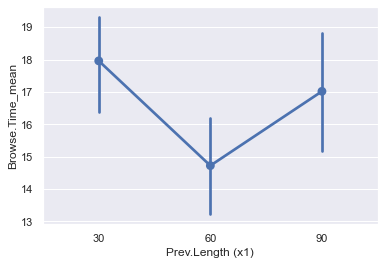

In [146]:
# Main effect of Annual Fee (x1)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="x1", y="Browse.Time_mean", data=dm_sorted)
fig1.set_ylabel("Browse.Time_mean")
fig1.set_xlabel("Prev.Length (x1)")
#fig1.set_ylim(0.01, 0.04)

Text(0.5, 0, 'Match.Score (x1)')

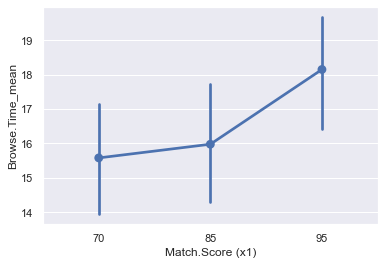

In [147]:
# Main effect of Annual Fee (x1)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="x2", y="Browse.Time_mean", data=dm_sorted)
fig1.set_ylabel("Browse.Time_mean")
fig1.set_xlabel("Match.Score (x1)")
#fig1.set_ylim(0.01, 0.04)

Text(0.5, 0, 'Prev.Type (x4)')

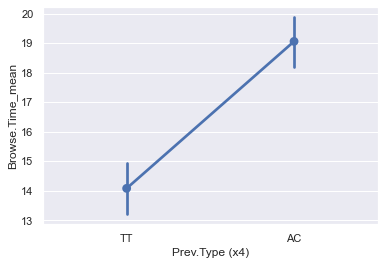

In [148]:
# Main effect of Annual Fee (x1)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="x4", y="Browse.Time_mean", data=dm_sorted)
fig1.set_ylabel("Browse.Time_mean")
fig1.set_xlabel("Prev.Type (x4)")
#fig1.set_ylim(0.01, 0.04)

Text(0.5, 0, 'C(Prev_Length)')

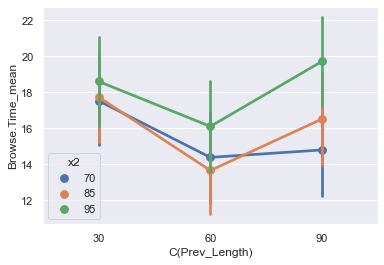

In [149]:
# Interaction between x1 and x2
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="x1", hue="x2", y="Browse.Time_mean", data=dm_sorted)
fig12.set_ylabel("Browse.Time_mean")
fig12.set_xlabel("C(Prev_Length)")


Text(0.5, 0, 'C(Match_Score)')

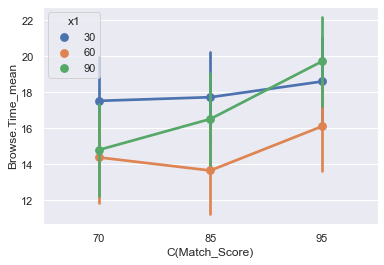

In [150]:
# Interaction between x1 and x2
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="x2", hue="x1", y="Browse.Time_mean", data=dm_sorted)
fig12.set_ylabel("Browse.Time_mean")
fig12.set_xlabel("C(Match_Score)")

In [20]:
df.columns.values[:-1]

array(['Prev.Length', 'Prev.Type', 'Match.Score', 'Tile.Size'],
      dtype=object)

# Hypothesis Testing

In [86]:
cond1 = df[(df['x1']==30)&(df['x2']==70)&(df['x4']=='TT')]
cond2 = df[(df['x1']==30)&(df['x2']==85)&(df['x4']=='TT')]
cond3 = df[(df['x1']==30)&(df['x2']==95)&(df['x4']=='TT')]
cond4 = df[(df['x1']==60)&(df['x2']==70)&(df['x4']=='TT')]
cond5 = df[(df['x1']==60)&(df['x2']==85)&(df['x4']=='TT')]
cond6 = df[(df['x1']==60)&(df['x2']==95)&(df['x4']=='TT')]
cond7 = df[(df['x1']==90)&(df['x2']==70)&(df['x4']=='TT')]
cond8 = df[(df['x1']==90)&(df['x2']==85)&(df['x4']=='TT')]
cond9 = df[(df['x1']==90)&(df['x2']==95)&(df['x4']=='TT')]

In [79]:
df_new = pd.read_csv('RESULTS_THIRTEEN_2022-01-19.csv')
df_new

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,60,75,0.2,TT,13.325328
1,60,90,0.2,TT,13.919920
2,50,85,0.2,TT,13.202504
3,70,85,0.2,TT,12.281604
4,60,75,0.2,TT,13.206069
...,...,...,...,...,...
395,70,85,0.2,TT,12.105020
396,60,75,0.2,TT,11.991356
397,60,90,0.2,TT,11.274822
398,50,85,0.2,TT,10.338589


In [122]:
cond10 = df_new[(df_new['Prev.Length']==60)&(df_new['Match.Score']==75)]
cond11 = df_new[(df_new['Prev.Length']==60)&(df_new['Match.Score']==90)]
cond12 = df_new[(df_new['Prev.Length']==50)&(df_new['Match.Score']==85)]
cond13 = df_new[(df_new['Prev.Length']==70)&(df_new['Match.Score']==85)]

In [87]:
print(cond1['y'].mean())
print(cond2['y'].mean())
print(cond3['y'].mean())
print(cond4['y'].mean())
print(cond5['y'].mean())
print(cond6['y'].mean())
print(cond7['y'].mean())
print(cond8['y'].mean())
print(cond9['y'].mean())

15.100756156509611
15.243401169358778
16.138091770318095
11.861234631385305
11.229528534167637
13.649672212203729
12.238098890911331
13.995170012742303
17.241595544084745


In [124]:
t, pv = stats.ttest_ind(cond5['y'], cond13['Browse.Time'], equal_var = True, alternative = 'two-sided')
print("t =", t)
print("p-value =", pv)

t = 0.9572925782975895
p-value = 0.33919557448558846


## Cond5 == Cond13

In [126]:
t, pv = stats.ttest_ind(cond5['y'], cond10['Browse.Time'], equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = -3.536328298946229
p-value = 0.9997648474588269


## Cond5 <= Cond10

In [129]:
cond14 = pd.read_csv('RESULTS_THIRTEEN_2022-01-19copy.csv')

In [130]:
cond14['Browse.Time'].mean()

12.046233625627062

In [131]:
t, pv = stats.ttest_ind(cond13['Browse.Time'], cond14['Browse.Time'], equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = -6.820150950494921
p-value = 0.9999999999461371


## Cond13 <= Cond14

In [135]:
cond15 = pd.read_csv('75.csv')

In [136]:
cond15['Browse.Time'].mean()

11.342581917800404

In [137]:
t, pv = stats.ttest_ind(cond13['Browse.Time'], cond15['Browse.Time'], equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = -1.6188946206380777
p-value = 0.9464691543822492


## Cond13 <= Cond15

In [112]:
df_4 = pd.read_csv('8088.csv')

In [138]:
cond16 = df_4[(df_4['Prev.Length']==70)&(df_4['Match.Score']==80)]
cond17 = df_4[(df_4['Prev.Length']==70)&(df_4['Match.Score']==88)]

In [139]:
print(cond16['Browse.Time'].mean())
print(cond17['Browse.Time'].mean())

10.697056614156761
11.777405152502611


In [141]:
t, pv = stats.ttest_ind(cond13['Browse.Time'], cond16['Browse.Time'], equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)

t = 3.037176430829037
p-value = 0.0013548097660188803


## Cond13 > Cond16

In [142]:
print(cond1['y'].mean())
print(cond2['y'].mean())
print(cond3['y'].mean())
print(cond4['y'].mean())
print(cond5['y'].mean())
print(cond6['y'].mean())
print(cond7['y'].mean())
print(cond8['y'].mean())
print(cond9['y'].mean())
print(cond10['Browse.Time'].mean())
print(cond11['Browse.Time'].mean())
print(cond12['Browse.Time'].mean())
print(cond13['Browse.Time'].mean())
print(cond14['Browse.Time'].mean())
print(cond15['Browse.Time'].mean())
print(cond16['Browse.Time'].mean())
print(cond17['Browse.Time'].mean())

15.100756156509611
15.243401169358778
16.138091770318095
11.861234631385305
11.229528534167637
13.649672212203729
12.238098890911331
13.995170012742303
17.241595544084745
11.678501897601448
11.940580194110982
12.631141561779122
11.111406369826634
12.046233625627062
11.342581917800404
10.697056614156761
11.777405152502611
